# 1.Dimensionality reduction 
In many datasets there are often too many features based on which the conclusion drawn. The higher the number of features, the harder it gets to visualize the training set and then work on it. Sometimes, most of these features are correlated, and hence redundant. It can be imagined that a 2D data i.e a data having two features which are linearly dependent on each other, such data can be reduced to a single dimension. This is where dimensionality reduction algorithms come into play. Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables. 

![title](1pca.bmp)
![title](2pca.bmp)


## 2. Advantages of dimensionality reduction
   1. It reduces the time and storage space required.
   
   2. Removal of multi-collinearity improves the performance of the machine-learning model.
   
   3. It becomes easier to visualize the data when reduced to very low dimensions such as 2D or 3D. 
    
## 3. Disadvantages of dimensionality reduction 

   1. It may lead to some amount of data loss.
   
   2. PCA tends to find linear correlations between variables, which is sometimes undesirable.
   
   3. PCA fails in cases where mean and covariance are not enough to define datasets.
   
   4. We may not know how many principal components to keep- in practice, some thumb rules are applied.
    
    
## 4. Principal component analysis  
Particularly, in this we need to transform variables into a new set of variables. As these are a linear combination of original variables. These new set of variables are known as principal components. Further, we need to obtain these in particular way. As first principle component accounts for the possible variation of original data. After which each succeeding component has the highest possible variance. The second principal component must be orthogonal to the first principal component. For two-dimensional dataset, there can be only two principal components. Applying PCA to your dataset loses its meaning.

## 5. PCA vs Linear Regression 
One might feel like we’re supposed to fit a line between multiple dimensions exploiting their linear dependence to obtain a single dimension just like linear regression, but it’s not true, linear regression and PCA are two separate things. Here in PCA we’re not trying to predict something on basis of a line. PCA is trying to find a lower dimension surface of line onto which it should project the data, so as to minimize the squared projection error (see diagram square projection error is the perpendicular distance from principal vector, while in linear regression the SSE is the difference in y value ).

![title](3pca.bmp)

By doing so maximum information from the data can now be explained in terms of the the u vector.
http://setosa.io/ev/principal-component-analysis/ for better visualisation .


## 6. PCA algorithm
   •	Data pre-processing : feature scaling / mean normalisation should always be performed.
   
   •	Calculation of covariance matrix.
   
   •	Find eigen values and eigen vectors corresponding to covariance matrix.
   
   •	Select top k eigen vectors which would account for most of the variance in data.
   
   •	Transform the original dataset with respect to these eigen vectors .
   


# PCA Code

In [1]:
import numpy as np
np.random.seed(2343243)

In [2]:
mean_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1 = np.random.multivariate_normal(mean_vec1, cov_mat1, 20)

In [3]:
mean_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2 = np.random.multivariate_normal(mean_vec2, cov_mat2, 20)

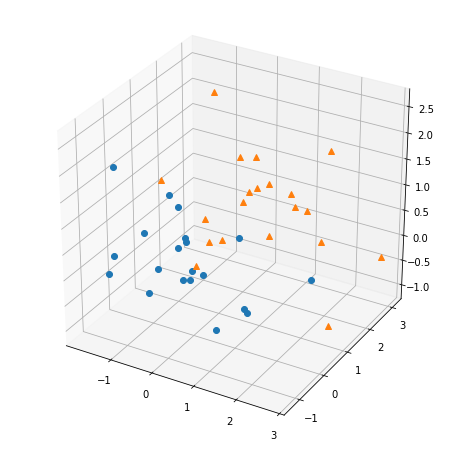

In [4]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.plot(class1[:, 0], class1[:, 1], class1[:, 2], 'o')
ax.plot(class2[:, 0], class2[:, 1], class2[:, 2], '^')
plt.show()

In [8]:
all_data = np.concatenate((class1, class2))
all_data.shape

(40, 3)

In [9]:
all_data.mean(axis = 0)

array([0.4560612 , 0.47118588, 0.64109922])

In [10]:
all_data = all_data.T

In [11]:
cov_mat = np.cov(all_data)    # Calculation of co-variance matrix
cov_mat       

array([[1.48156581, 0.43272336, 0.00832651],
       [0.43272336, 1.06868385, 0.09154185],
       [0.00832651, 0.09154185, 0.77659054]])

In [12]:
eig_val, eig_vec = np.linalg.eig(cov_mat)      # Calculation of eigen values and eigen vectors 
eig_val, eig_vec, eig_vec[:,0]                 # i-th column from eig_vec contains eigen vector for i-th element in eig_val 

(array([1.75777104, 0.8582392 , 0.71082995]),
 array([[-0.84204244, -0.43906668,  0.31334482],
        [-0.5363712 ,  0.61995098, -0.57268378],
        [-0.05718794,  0.65029319,  0.75752776]]),
 array([-0.84204244, -0.5363712 , -0.05718794]))

In [13]:
eig_val_vec_pairs = []
for i in range(len(eig_val)):
    eig_vector = eig_vec[:,i]
    eig_val_vec_pairs.append((eig_val[i], eig_vector))   
eig_val_vec_pairs.sort(reverse = True)                   ## selecting top-2 most important eigen values with most explained variance                       
matrix_eig = np.array([eig_val_vec_pairs[0][1],eig_val_vec_pairs[1][1]]) 
matrix_eig

array([[-0.84204244, -0.5363712 , -0.05718794],
       [-0.43906668,  0.61995098,  0.65029319]])

In [14]:
eig_val_vec_pairs


[(1.7577710419235266, array([-0.84204244, -0.5363712 , -0.05718794])),
 (0.8582391965561236, array([-0.43906668,  0.61995098,  0.65029319])),
 (0.7108299538825634, array([ 0.31334482, -0.57268378,  0.75752776]))]

In [15]:
transformed = matrix_eig.dot(all_data)    #Transforming data into 2D 
transformed = transformed.T
transformed.shape

(40, 2)

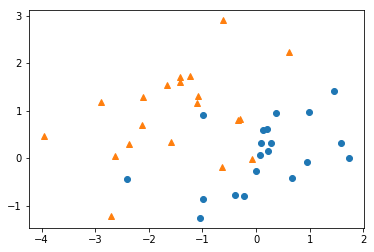

In [16]:
plt.plot(transformed[0:20, 0], transformed[0:20, 1], 'o')
plt.plot(transformed[20:40, 0], transformed[20:40, 1], '^')

plt.show()

## PCA Ib-BUILT

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components =2)
skl_transformed = pca.fit_transform(all_data.T)

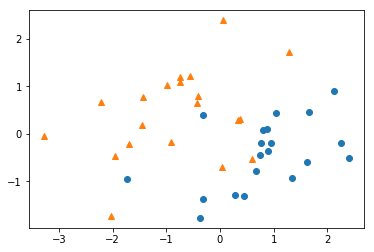

In [19]:
skl_transformed[:, 0] *= -1
plt.plot(skl_transformed[0:20, 0], skl_transformed[0:20, 1], 'o')
plt.plot(skl_transformed[20:40, 0], skl_transformed[20:40, 1], '^')

plt.show()

## How to select value of K 
Value of k is directly proportional to variance explained by data, thus selecting an optimal value of k is very imporatant. Primary objective should be to select k small enough to explain maximum variance is the transformed data. Then transforming the data into k dimensions.


C:\Users\HP-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  


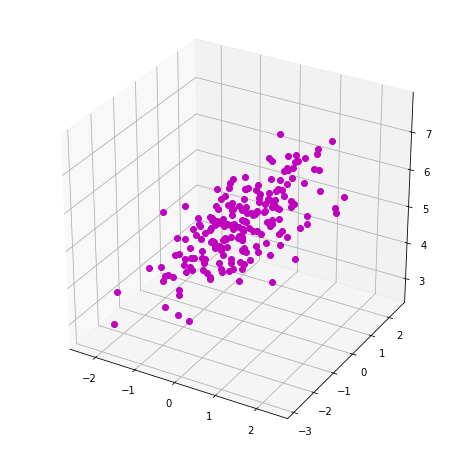

In [20]:
import numpy as np
import pandas as pd

#creating a plane (now maximum variance would be explained by only 2 axis)

mean_vec1 = np.array([0,0,5])
cov_mat1 = np.array([[1,0,1],[0,1,0],[0.5,0,0.9]])
class1 = np.random.multivariate_normal(mean_vec1, cov_mat1, 200)



fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')        #111 is 1 row and 1 column of plot and last 1 is for position
ax.plot(class1[:, 0], class1[:, 1], class1[:, 2], 'o',color="m")
plt.show()

In [22]:
df=pd.DataFrame(class1)
df.to_csv('3d_points.csv', index=False)
# https://plot.ly/create/#/ 
#upload the saved file there to see the 3D plot more clearly 

In [23]:
pca = PCA()
pca.fit(class1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [24]:
k = 0
total = 0
while total <.9:
    total = total + pca.explained_variance_ratio_[k]  #adding variance ratio 
    k = k + 1
k

2

In [25]:
pca = PCA(n_components=2)
#pca.fit(class1)

skl_transformed = pca.fit_transform(class1) 
pca.components_
pca.explained_variance_ratio_ #explained variance ratios wrt each component 

array([0.58563216, 0.34104541])

Clearly taking first two components will work well as 90% of variance would still be present in data.

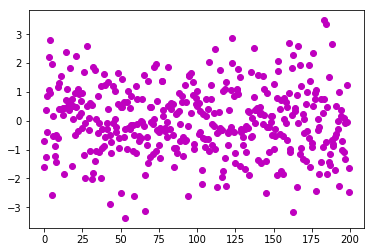

In [26]:
plt.plot(skl_transformed, 'o',color="m")
plt.show()